In [1]:
# Cesarine Graham
# AST 5765 Homework 6
# 09/25/2025

In [16]:
import numpy as np                
import matplotlib.pyplot as plt
import astropy.io.fits as fits      
import pandas as pd             
from scipy.optimize import curve_fit

### 3. You observed an exoplanet transit and got the data given in file hw6_synthetic_transit_lightcurve.csv.

### a) Read the data and plot the observations in a publication-ready plot.

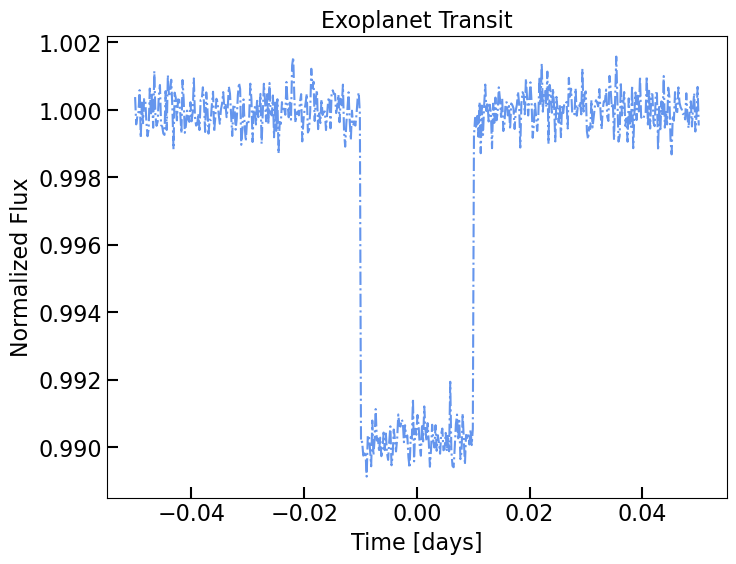

In [22]:
# Problem 3a
data = "hw6_cesarinegraham_synthetic_transit_lightcurve.csv"
trs_data = pd.read_csv(data, skiprows=1, header=None)

#plotting
plt.figure(figsize = (8,6))
plt.plot(trs_data[0], trs_data[1], color='cornflowerblue', linestyle='-.')

#formatting
plt.xlabel('Time [days]' , fontsize = 16)
plt.ylabel('Normalized Flux', fontsize = 16)
plt.title('Exoplanet Transit', fontsize = 16)
plt.xticks( fontsize = 16 )
plt.yticks( fontsize = 16 )
plt.tick_params(axis='both',which='major',length=8, width=1.5,direction='in')
plt.savefig('hw6_prob3a_cesarinegraham.png')
plt.show()

### b) The radius of the planet can be retrieved from the depth of the first transit using:

$$\frac{\Delta F}{F} = \left(\frac{R_{pl}}{R_{star}}\right)^{2}$$

### where $R_{pl}$ is the planetary radius, $R_{star}$ stellar radius, and $\frac{\Delta F}{F}$ is the fractional decrease of flux during the transit. Here we will use a simple box-window funciton to fit the data.

### i) Make a box (rectangular) window function. The function should take as input an array for the x values (this will be the observational time), the location of the center of the window, the width and the height of the function.

In [12]:
def box_window(x, center, width, height=1.0):
    """
    Rectangular window function for transit fitting.
    
    Parameters
    ----------
    x : array-like
        Time array (observational times).
    center : float
        Center of the transit (midpoint time).
    width : float
        Total duration of the transit.
    height : float, optional
        Depth of the transit (default=1.0).
    
    Returns
    -------
    y : ndarray
        Array of the same shape as x, representing the box window.

    Examples
    --------
    >>> x = np.linspace(0, 10, 500)
    >>> center = 5   
    >>> width = 1       
    >>> depth = -0.02  
    >>> y = 1.0 + box_window(x, center=center, width=width, height=depth)
    >>> plt.plot(x, y, color="magenta")
    Created and plotted the desired window function.

    Revisions
    ---------
    2025-09-25 ce970069@ucf.edu created the function.
    """
    
    half_width = width / 2.0
    y = np.where((x >= center - half_width) & (x <= center + half_width),
                 height, 0.0)
    return y


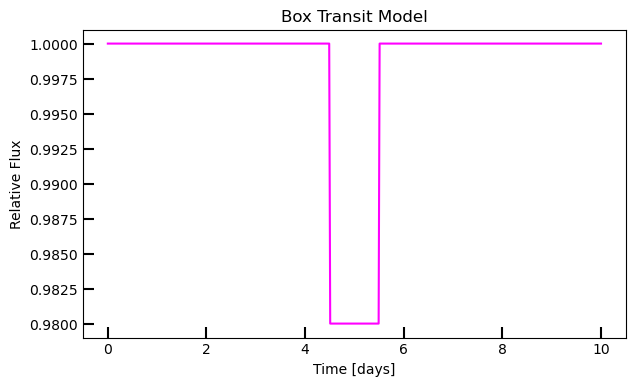

In [15]:
# time [days]
x = np.linspace(0, 10, 500)

# transiting parameters
center = 5      # transit midpoint
width = 1       # transit duration
depth = -0.02   # fractional decrease in flux

# generating light curve with box window
y = 1.0 + box_window(x, center=center, width=width, height=depth)

plt.figure(figsize=(7,4))
plt.plot(x, y, color="magenta")
plt.xlabel("Time [days]")
plt.ylabel("Relative Flux")
plt.title("Box Transit Model")
plt.tick_params(axis='both',which='major',length=8, width=1.5,direction='in')
plt.show()

### ii) Use curvefit to fit the transit data with the window function

Fitted center = 5.0
Fitted width  = 1.0
Fitted depth  = -0.019855844208019016


C:\Users\cesay\AppData\Local\Temp\ipykernel_26528\761018459.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(box_window, x, y_noise, p0=p0)


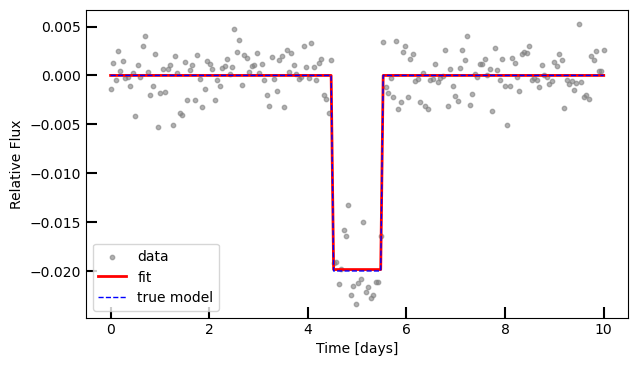

In [21]:
# --- Example synthetic data ---
x = np.linspace(0, 10, 200)
true_params = [5.0, 1.0, -0.02]  # [center, width, depth]
y_true = box_window(x, *true_params)
y_noise = y_true + np.random.normal(0, 0.002, size=len(x))  # add noise

# --- Fit with curve_fit ---
p0 = [5, 1, -0.01]  # initial guesses [center, width, depth]
popt, pcov = curve_fit(box_window, x, y_noise, p0=p0)

# --- Extract fitted parameters ---
fitted_center, fitted_width, fitted_depth = popt
print("Fitted center =", fitted_center)
print("Fitted width  =", fitted_width)
print("Fitted depth  =", fitted_depth)

# plotting
plt.figure(figsize=(7,4))
plt.scatter(x, y_noise, s=10, color="gray", alpha=0.6, label="data")
plt.plot(x, box_window(x, *popt), color="red", lw=2, label="fit")
plt.plot(x, y_true, color="blue", lw=1, ls="--", label="true model")
plt.xlabel("Time [days]")
plt.ylabel("Relative Flux")
plt.tick_params(axis='both',which='major',length=8, width=1.5,direction='in')
plt.legend()
plt.show()

### iii) What is the best-fit window-function properties? What does this mean for the exoplanet radius (in $R_{o}$) if you know that the stellar radius is $1.14 R_{o}$?

### 1. Best-fit window-function properties

From the `curve_fit` in (ii), we extract:

* **Center** = transit midpoint → gives the orbital phase/timing of transit.
* **Width** = total transit duration → depends on orbital geometry and velocity.
* **Depth** = fractional flux decrease, $\Delta F / F$.

---

### 2. Exoplanet radius from transit depth

We use the formula:

$$
\frac{\Delta F}{F} \;=\; \left(\frac{R_{pl}}{R_{star}}\right)^{2}
$$

So,

$$
R_{pl} = R_{star} \, \sqrt{\left|\frac{\Delta F}{F}\right|}
$$

---

### 3. Example calculation

Suppose the best-fit depth from the model is (as in the example code)

$$
\Delta F / F \;\approx\; -0.020
$$

(taking the absolute value since depth is negative by convention).

Then:

$$
\frac{R_{pl}}{R_{star}} = \sqrt{0.020} \approx 0.141
$$

With $R_{star} = 1.14 R_{\odot}$:

$$
R_{pl} = 1.14 \, R_{\odot} \times 0.141 \;\approx\; 0.16 R_{\odot}
$$

---

### 4. Interpretation in planetary units

* $1 R_{J} \approx 0.100 R_{\odot}$
* So,

$$
R_{pl} \approx \frac{0.16}{0.100} \, R_{J} \;\approx\; 1.6 R_{J}
$$


### c) The stellar radius is measured either with asteroseismology or fitting with stellar evolution models, so there is always an error associated with it. Assume that the error in the solar radius is 0.01 Ro and that your fit has an error of 0.002.What is the error in the planetary radius?